In [159]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [160]:
#Crear una clase "Model" que incluye "nn.Module"
class Model(nn.Module):
  # Input layer (4 características de la flor) -->
  # Hidden Layer1 (Numero de neuronas) -->
  # H2 (n) -->
  # output (3 clases de la flor iris)
  def __init__(self, in_features=4, h1=8, h2=9, out_features = 3):
    super().__init__() # instancia a nn.Module
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x

In [161]:
# Seleccionar una semilla manualmente para la aletoriedad
torch.manual_seed(41)
# Crear una instancia del modelo
model = Model()

In [162]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [163]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)

In [164]:
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [165]:
# Cambia la última columna de strings a números
my_df['variety'] = my_df['variety'].replace('Setosa', 0.0)
my_df['variety'] = my_df['variety'].replace('Versicolor', 1.0)
my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)
my_df

/tmp/ipython-input-3643017404.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [166]:
# Train Test Split! Set X, y
X = my_df.drop('variety', axis=1)
y = my_df['variety']

In [167]:
# Convierte esto en numpy arrays
X = X.values
y = y.values

In [168]:
from sklearn.model_selection import train_test_split

In [169]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [170]:
# Convierte las características de X en tensores flotantes
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [171]:
# Convierte las etiquetas y en tensores tipo 'long'
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [172]:
# Inicializa el criterio del modelo para ajustar el error, que tan alejadas las predicciones están de los datos reales
criterion = nn.CrossEntropyLoss()
# Elegimos Adam Optimizer, lr = learning rate
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [173]:
# Train our  model!!
epoch = 100
losses = []

for i in range(epoch):
  # Go forward and get a prediction
  y_pred = model.forward(X_train) # Obtiene el resultado de las predicciones

  # Measure the loss/error, gonna be high at first
  loss = criterion(y_pred, y_train)

  # Keep Track of our losses
  losses.append(loss.detach().numpy())

  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  # Do some back propagation: take the error rate of forward propagation and feed it back
  # thru the network to fine tune the weigths
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


Epoch: 0 and loss: 1.125203251838684
Epoch: 10 and loss: 1.0097211599349976
Epoch: 20 and loss: 0.8162347674369812
Epoch: 30 and loss: 0.585993230342865
Epoch: 40 and loss: 0.4003389775753021
Epoch: 50 and loss: 0.26794716715812683
Epoch: 60 and loss: 0.1796349585056305
Epoch: 70 and loss: 0.12165623158216476
Epoch: 80 and loss: 0.0860651507973671
Epoch: 90 and loss: 0.06522614508867264


Text(0.5, 0, 'epoch')

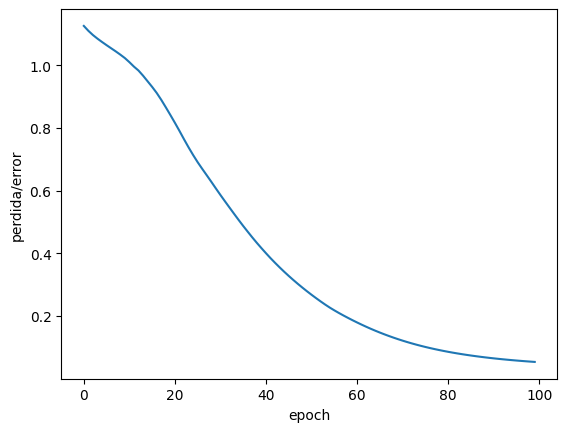

In [174]:
# Graficamos
plt.plot(range(epoch), losses)
plt.ylabel("perdida/error")
plt.xlabel("epoch")